# Notebook Dedicated to Observe how cto employ the PMT hit charge to Discriminate Directional Events. For this, a correlation between charge and direction must be observed

In [76]:
import numpy as np
import pandas as pd
import random 

import glob
import re
import os

import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
from matplotlib import cm

# Load Numpy files

In [5]:
# ============ Data Cuts Settings ============
energy_inf_cut = 2.5
energy_sup_cut = 12

posr_cut = 5500

time_res_inf_cut = -1
time_res_sup_cut = 5

nhits_cut = 20 #Nhits cut to be applied after the time residual cuts

In [6]:
main_dir = f'E:/Data/solars/mc/ML Data/np_arrays/Train/E_{energy_inf_cut}_{energy_sup_cut}_MeV_R_{posr_cut}_mm_Delta_{time_res_inf_cut}_{time_res_sup_cut}_ns/'
solar_fpattern = 'SolarNue_'
tl208_fpattern = '208Tl_'

observable_name = ['evtid', 'energy', 'posr', 'cos_alpha', 'hit_residual', 'hit_pmtQHS']

solar_dict = {var_i: np.array([]) for var_i in observable_name}
tl208_dict = {var_i: np.array([]) for var_i in observable_name}

#Load each varibles within a loop of variables and fill the dictionaries
#Loop over var names
for var_i in observable_name:
    #create flist for the multiple var_i observables (exm: evID_0, evID_1, ...)
    solar_var_i_flist = glob.glob(main_dir + solar_fpattern + var_i + '*.npy')
    tl208_var_i_flist = glob.glob(main_dir + tl208_fpattern + var_i + '*.npy')

    #Loop over flist:
    for solar_file_i in solar_var_i_flist:
        load_solar_var_i = np.load(solar_file_i)
        solar_dict[var_i] = np.append(solar_dict[var_i], load_solar_var_i)

    for tl208_file_i in tl208_var_i_flist:
        load_208tl_var_i = np.load(tl208_file_i)
        tl208_dict[var_i] = np.append(tl208_dict[var_i], load_208tl_var_i)

## Remove Redundant Values

In [7]:
# List of Observables
nonper_hit_observables_name = ['evtid', 'posr', 'energy'] 
per_hit_observables = ['cos_alpha', 'hit_residual', 'hit_pmtQHS']

# ============= Solar Processing =============

#Extract the redundant evID
solar_evID = solar_dict['evtid']

# Empty lists which will contain the nonper-hit observables
solar_dict_ev = {var_i: [] for var_i in nonper_hit_observables_name + per_hit_observables}

#evID index break list
solar_data_break_i = [0]  # array whose elements are the index from where an event start and end.

solar_N_data = len(solar_evID)

print('Looking for break index in solars evID')
for i_dx in range(solar_N_data - 1):
    if solar_evID[i_dx] != solar_evID[i_dx+1]:
        solar_data_break_i.append(i_dx+1)

#add the last index to complete the data_break_i list
solar_data_break_i.append(solar_N_data - 1)

N_solar_terms = len(solar_data_break_i)

#Start to save the non-redundant (non-per-hit) values and separate the time residuals and angles for each event
#Solar Loop
print(f'saving the observables for solars')
for i_dx in range(N_solar_terms - 1):
    init_i = solar_data_break_i[i_dx]
    final_i = solar_data_break_i[i_dx+1]
    
    for var_i in nonper_hit_observables_name:
        nonper_hit_var_i_value = solar_dict[var_i][init_i : final_i][0]
        solar_dict_ev[var_i].append(nonper_hit_var_i_value)

    for var_i in per_hit_observables:
        per_hit_var_i_values = solar_dict[var_i][init_i : final_i]
        solar_dict_ev[var_i].append(per_hit_var_i_values)

#Transform to array
print('Transforming solars to np.array')
for var_i in nonper_hit_observables_name:
    print(f'transforming to np.array {var_i}')
    solar_dict_ev[var_i] = np.array(solar_dict_ev[var_i])

Looking for break index in solars evID
saving the observables for solars
Transforming solars to np.array
transforming to np.array evtid
transforming to np.array posr
transforming to np.array energy


In [8]:
# ============= Tl208 Processing =============

#Extract the redundant evID
tl208_evID = tl208_dict['evtid']

# Empty lists which will contain the nonper-hit observables
tl208_dict_ev = {var_i: [] for var_i in nonper_hit_observables_name + per_hit_observables}

#evID index break list
tl208_data_break_i = [0]  # array whose elements are the index from where an event start and end.

tl208_N_data = len(tl208_evID)

print('Looking for break index in Tl208 evID')
for i_dx in range(tl208_N_data - 1):
    if tl208_evID[i_dx] != tl208_evID[i_dx+1]:
        tl208_data_break_i.append(i_dx+1)

#add the last index to complete the data_break_i list
tl208_data_break_i.append(tl208_N_data - 1)

N_tl208_terms = len(tl208_data_break_i)

#Start to save the non-per-hit values and separate the time residuals and angles for each event
# Loop on Events
print(f'saving the observables for Tl208')
for i_dx in range(N_tl208_terms - 1):
    init_i = tl208_data_break_i[i_dx]
    final_i = tl208_data_break_i[i_dx+1]
    
    for var_i in nonper_hit_observables_name:
        nonper_hit_var_i_value = tl208_dict[var_i][init_i : final_i][0]
        tl208_dict_ev[var_i].append(nonper_hit_var_i_value)

    for var_i in per_hit_observables:
        per_hit_var_i_values = tl208_dict[var_i][init_i : final_i]
        tl208_dict_ev[var_i].append(per_hit_var_i_values)

#Transform to array
print('Transforming Tl208 to np.array')
for var_i in nonper_hit_observables_name:
    print(f'transforming to np.array {var_i}')
    tl208_dict_ev[var_i] = np.array(tl208_dict_ev[var_i])

Looking for break index in Tl208 evID
saving the observables for Tl208
Transforming Tl208 to np.array
transforming to np.array evtid
transforming to np.array posr
transforming to np.array energy


# Charge Analysis

## Solars

In [6]:
solar_dict.keys()

dict_keys(['evtid', 'energy', 'posr', 'cos_alpha', 'hit_residual', 'hit_pmtQHS'])

In [9]:
solarQHS = solar_dict['hit_pmtQHS']
solar_cos_alpha = solar_dict['cos_alpha']
solar_time_res = solar_dict['hit_residual']
solar_energy = solar_dict['energy']

### QHS Distribution

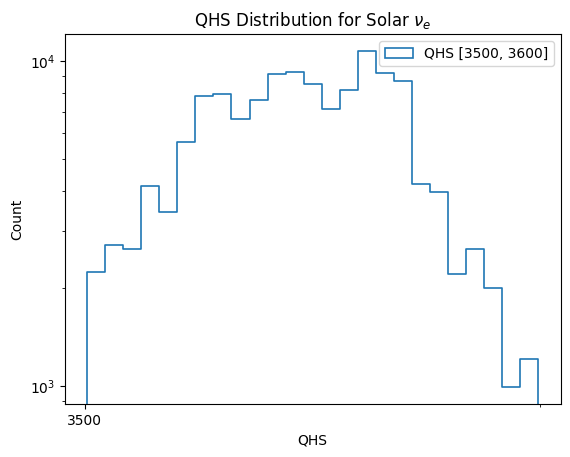

In [100]:
qhs_inf_cut = 3500
qhs_sup_cut = 3600

cut_condition = (solarQHS > qhs_inf_cut) & (solarQHS < qhs_sup_cut)

fig, ax = plt.subplots()
sn.histplot(solarQHS[cut_condition], bins = 25, element = 'step', alpha = 0, linewidth = 1.2, label = f'QHS [{qhs_inf_cut}, {qhs_sup_cut}]')

plt.legend(loc = 'best')
plt.xlabel('QHS')

plt.yscale('log')
ax.xaxis.set_major_locator(MultipleLocator(500))     
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.xaxis.set_major_formatter(ScalarFormatter())  #Avoid scientific notation

plt.title(r'QHS Distribution for Solar $\nu_e$')

plt.show()

### cos($\alpha$) for various QHS Cuts

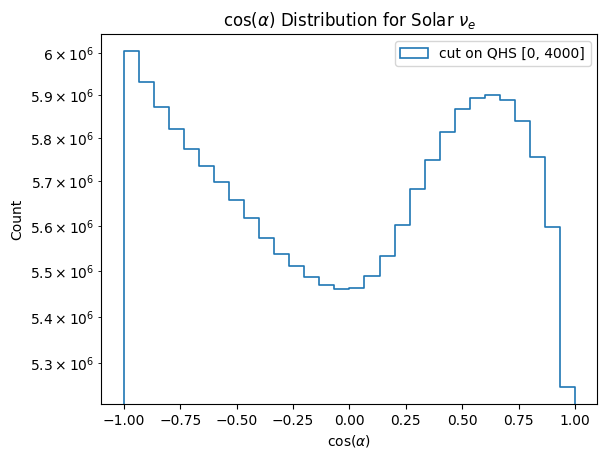

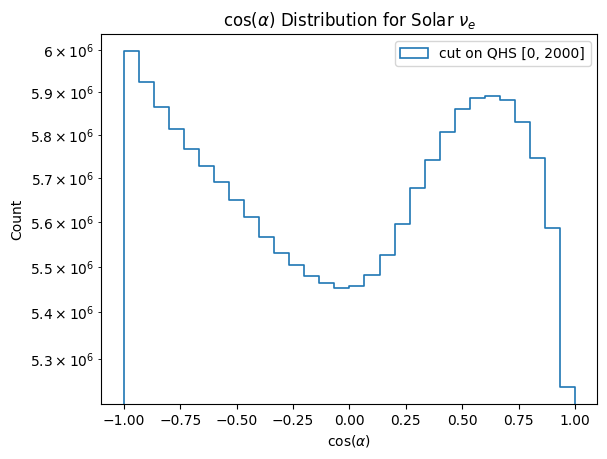

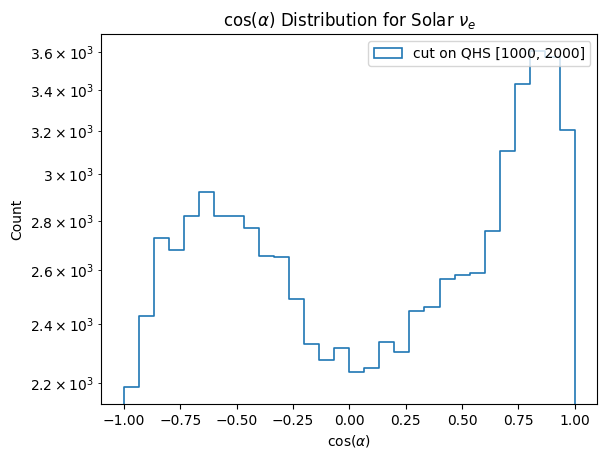

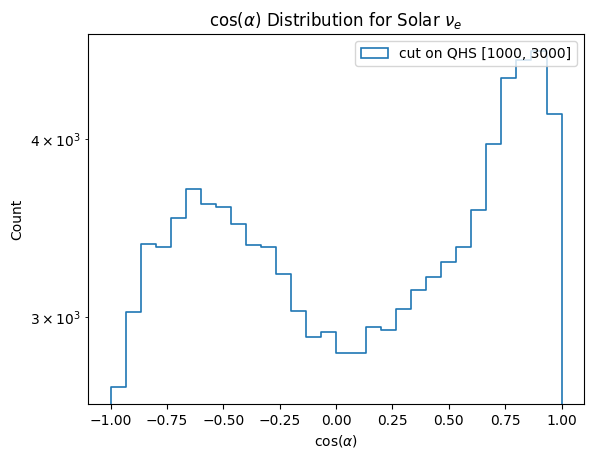

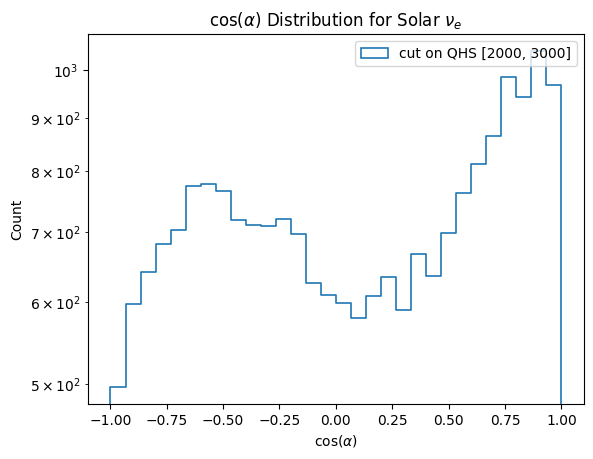

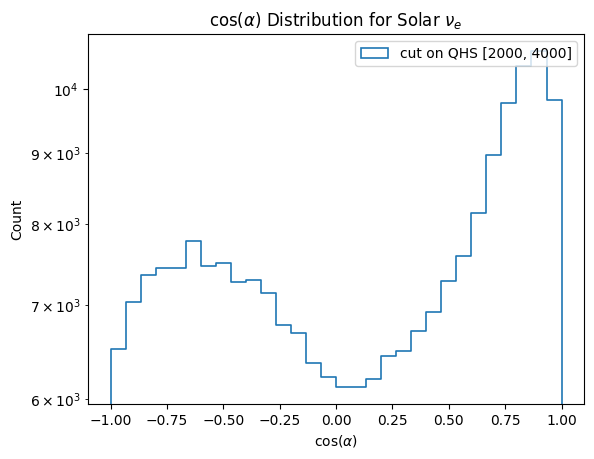

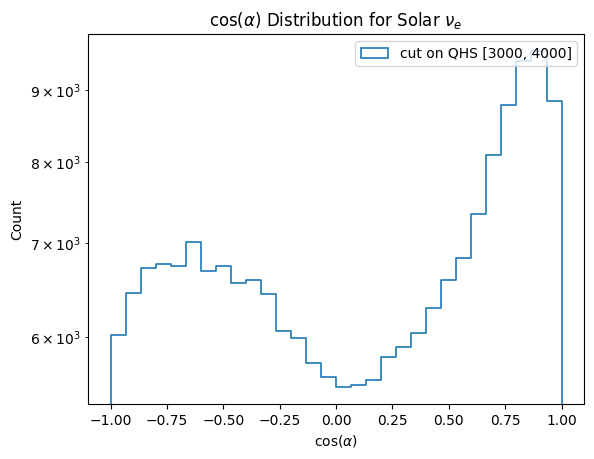

In [8]:
qhs_cut_list = [(0, 4000), (0, 2000), (1000, 2000), (1000, 3000), (2000, 3000), (2000, 4000), (3000, 4000)]  #Values are (qhs_min, qhs_max)

for qhs_cut_i in qhs_cut_list:
    
    qhs_inf_cut = qhs_cut_i[0]
    qhs_sup_cut = qhs_cut_i[1]

    cut_condition = (solarQHS > qhs_inf_cut) & (solarQHS < qhs_sup_cut)
    
    sn.histplot(solar_cos_alpha[cut_condition], bins = 30, element = 'step', alpha = 0, 
                linewidth = 1.2, label = f'cut on QHS [{qhs_inf_cut}, {qhs_sup_cut}]')
    
    plt.legend(loc = 'best')

    plt.xlabel(r'cos($\alpha$)')
    plt.legend()

    plt.title(r'cos($\alpha$) Distribution for Solar $\nu_e$')
    
    plt.yscale('log')
    
    plt.show()

### cos($\alpha$) and QHS Correlation

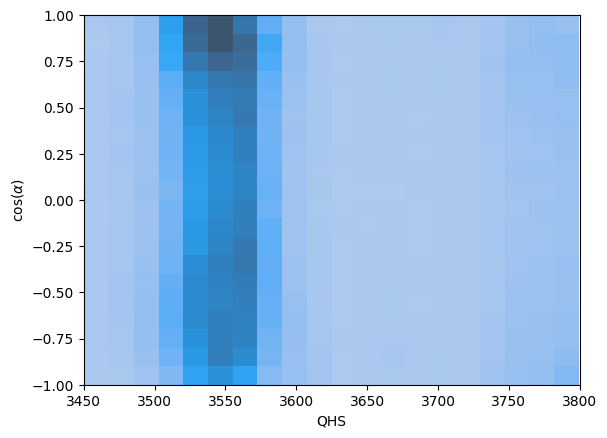

In [10]:
qhs_inf_cut = 3450
qhs_sup_cut = 3800

cut_condition = (solarQHS > qhs_inf_cut) & (solarQHS < qhs_sup_cut)

sn.histplot(x = solarQHS[cut_condition], y = solar_cos_alpha[cut_condition], bins = (20, 20))

plt.xlabel('QHS')
plt.ylabel(r'cos($\alpha$)')

plt.xlim(qhs_inf_cut, qhs_sup_cut)
plt.ylim(-1, 1)

plt.show()

### cos($\alpha$) and QHS Correlation with Normalization by Nhits

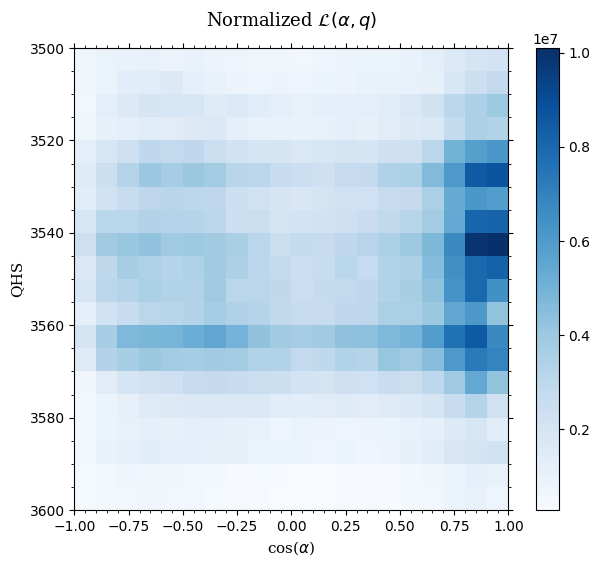

In [96]:
# ==== Cuts on QHS ======
qhs_inf_cut = 3500
qhs_sup_cut = 3600

cut_condition = (solarQHS > qhs_inf_cut) & (solarQHS < qhs_sup_cut)

counts, xedge, yedge = np.histogram2d(x = solarQHS[cut_condition], y = solar_cos_alpha[cut_condition], bins = (20, 20))

# ======= Normalization by multiplying for the number of hits =======
N = np.sum(counts, axis = 0)
norm_counts = counts * N


# ======= Plot =======

# --- Font Style ---
font_style_title = {'family':'serif', 'weight': 'normal','color':'black','size':13}
font_style_axis= {'family':'serif', 'weight': 'normal','color':'black','size':11}

fig, ax = plt.subplots(figsize=(7,6))
plt.imshow(norm_counts, extent = [-1, 1, qhs_sup_cut,  qhs_inf_cut], aspect = 'auto', cmap = cm.Blues)


# ---- (x,y) tick locators ----
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.xaxis.set_major_formatter(ScalarFormatter())  #Avoid scientific notation

ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(ScalarFormatter())  #Avoid scientific notation

ax.tick_params(which='minor', top=True, bottom=True, left=True, right=True)
ax.tick_params(which='major', top=True, bottom=True, left=True, right=True)

# ---- titles ----
plt.xlabel(r'cos($\alpha$)', fontdict = font_style_axis)
plt.ylabel('QHS', fontdict = font_style_axis)

plt.title(r'Normalized $\mathcal{L}(\alpha, q)$', fontdict = font_style_title, y = 1.03)

plt.colorbar()

plt.show()

#### $\mathcal{L}(\alpha, q)$ Projection on cos($\alpha$) axis

Take the summed values of all QHS values along a cos(δα) slice, and plot the point vs. the corresponding cosα bin center.

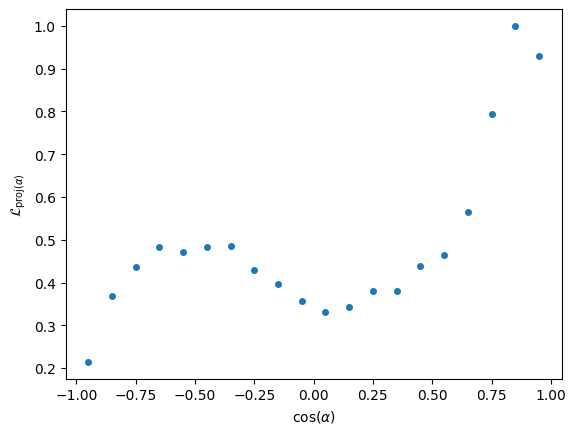

In [112]:
bin_centes = (yedge[:-1] + yedge[1:]) / 2
L_proj = np.sum(norm_counts, axis = 0)  # Likelihood projection on x-axis
L_proj = L_proj/np.max(L_proj)

plt.scatter(bin_centes, L_proj, marker = '.', linewidths = 2)

plt.xlabel(r'cos($\alpha$)')
plt.ylabel(r'$\mathcal{L}_{\text{proj}(\alpha)}$')

plt.show()

Text(0, 0.5, '$\\mathcal{L}_{\\text{proj(QHS)}}$')

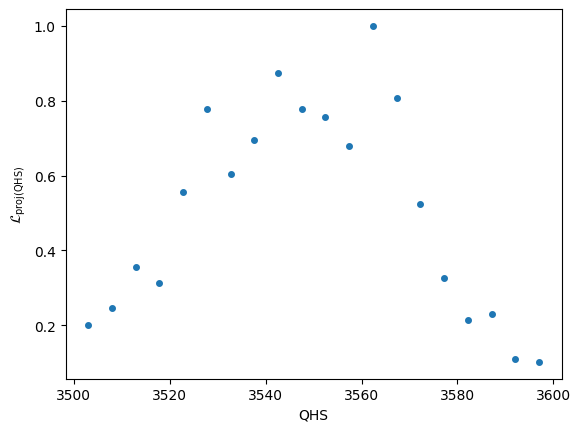

In [113]:
bin_centes = (xedge[:-1] + xedge[1:]) / 2
L_proj = np.sum(norm_counts, axis = 1)  # Likelihood projection on x-axis
L_proj = L_proj/np.max(L_proj)

plt.scatter(bin_centes, L_proj, marker = '.', linewidths = 2)

plt.xlabel(r'QHS')
plt.ylabel(r'$\mathcal{L}_{\text{proj(QHS)}}$')


## Charge-Energy Correlation

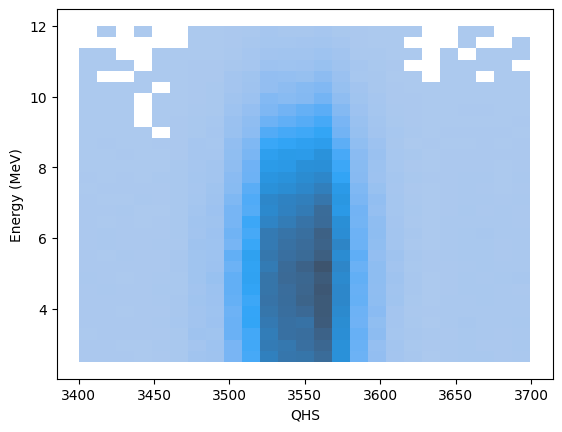

In [59]:
qhs_inf_cut = 3400
qhs_sup_cut = 3700

cut_condition = (solarQHS > qhs_inf_cut) & (solarQHS < qhs_sup_cut)

sn.histplot(x = solarQHS[cut_condition], y = solar_energy[cut_condition], bins = (25, 30))

plt.xlabel('QHS')
plt.ylabel(r'Energy (MeV)')

#plt.xlim(qhs_inf_cut, qhs_sup_cut)
#plt.ylim(-1, 1)

plt.show()

## Charge-Time res. Correlation

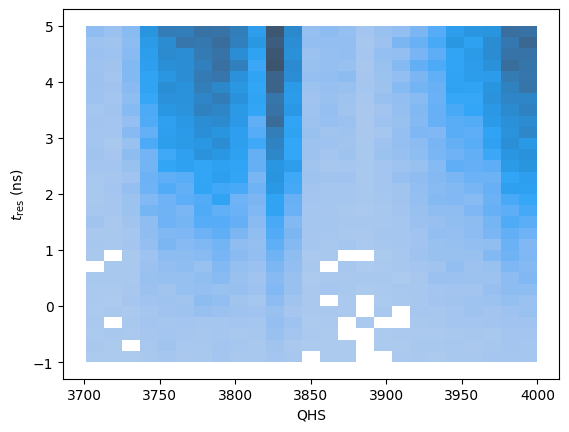

In [79]:
qhs_inf_cut = 3700
qhs_sup_cut = 4000

cut_condition = (solarQHS > qhs_inf_cut) & (solarQHS < qhs_sup_cut)

sn.histplot(x = solarQHS[cut_condition], y = solar_time_res[cut_condition], bins = (25, 30))

plt.xlabel('QHS')
plt.ylabel(r'$t_\text{res}$ (ns)')

#plt.xlim(qhs_inf_cut, qhs_sup_cut)
#plt.ylim(-1, 1)

plt.show()

# 208-Tl

In [57]:
tl208QHS = tl208_dict['hit_pmtQHS']
tl208_cos_alpha = tl208_dict['cos_alpha']
tl208_time_res = tl208_dict['hit_residual']
tl208_energy = tl208_dict['energy']

### QHS Distribution

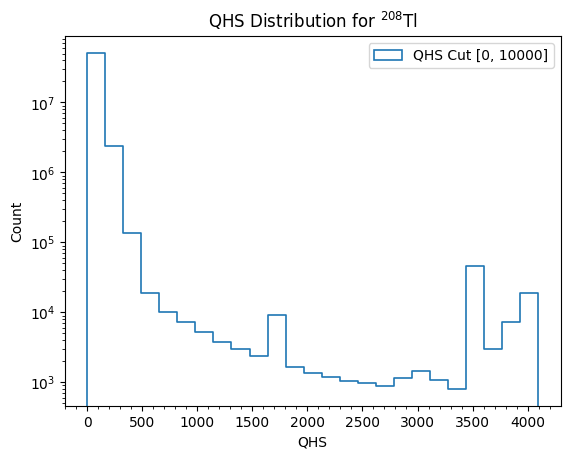

In [88]:
qhs_inf_cut = 0
qhs_sup_cut = 10000

cut_condition = (tl208QHS > qhs_inf_cut) & (tl208QHS < qhs_sup_cut)

fig, ax = plt.subplots()
sn.histplot(tl208QHS[cut_condition], bins = 25, element = 'step', alpha = 0, linewidth = 1.2, label = f'QHS Cut [{qhs_inf_cut}, {qhs_sup_cut}]')

plt.legend(loc = 'best')
plt.xlabel('QHS')

ax.xaxis.set_major_locator(MultipleLocator(500))     
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.xaxis.set_major_formatter(ScalarFormatter())  #Avoid scientific notation
plt.yscale('log')

plt.title(r'QHS Distribution for $^{208}$Tl')

plt.show()

### cos($\alpha$) for various QHS Cuts

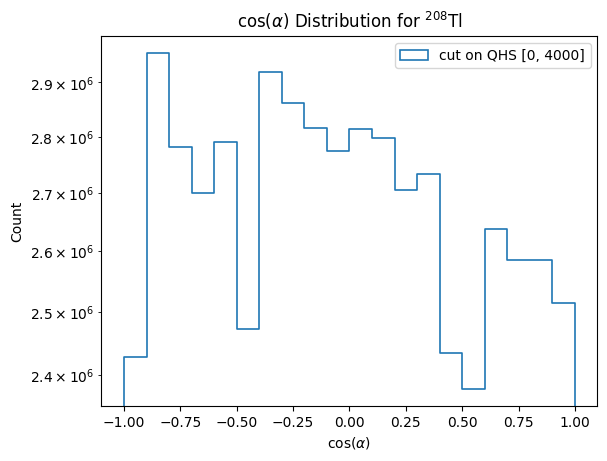

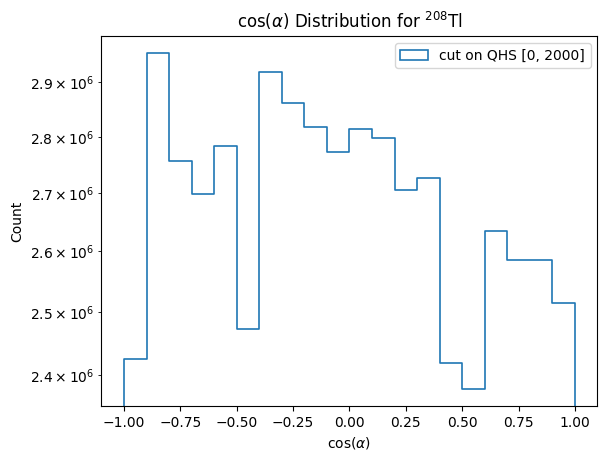

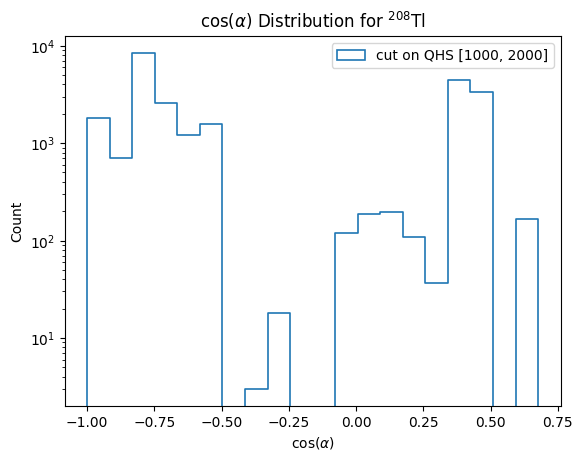

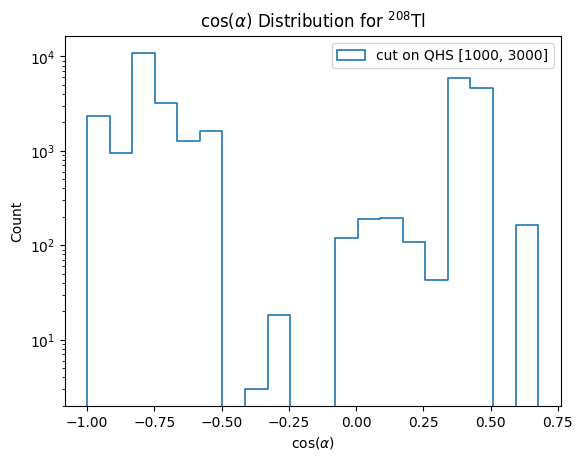

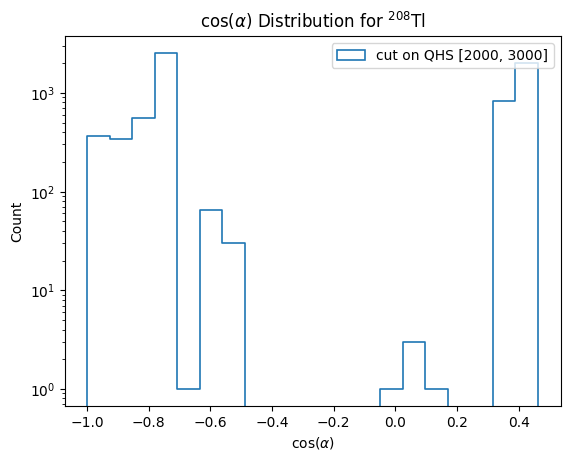

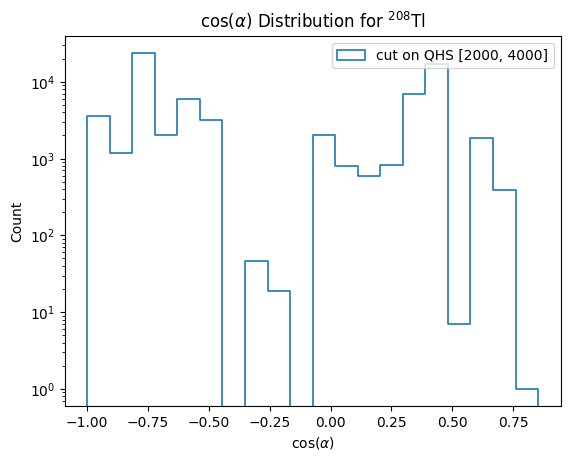

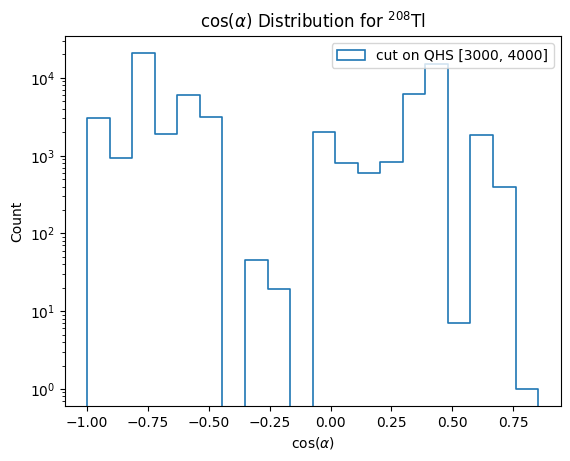

In [17]:
qhs_cut_list = [(0, 4000), (0, 2000), (1000, 2000), (1000, 3000), (2000, 3000), (2000, 4000), (3000, 4000)]  # Values are (qhs_min, qhs_max)

for qhs_cut_i in qhs_cut_list:
    
    qhs_inf_cut = qhs_cut_i[0]
    qhs_sup_cut = qhs_cut_i[1]

    cut_condition = (tl208QHS > qhs_inf_cut) & (tl208QHS < qhs_sup_cut)
    
    sn.histplot(tl208_cos_alpha[cut_condition], bins = 20, element = 'step', alpha = 0, 
                linewidth = 1.2, label = f'cut on QHS [{qhs_inf_cut}, {qhs_sup_cut}]')
    
    plt.legend(loc = 'best')

    plt.xlabel(r'cos($\alpha$)')
    plt.legend()

    plt.title(r'cos($\alpha$) Distribution for $^{208}$Tl')
    
    plt.yscale('log')
    
    plt.show()

### cos($\alpha$) and QHS Correlation

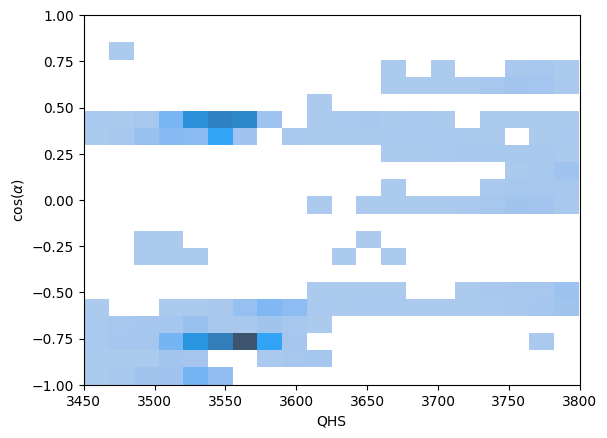

In [59]:
qhs_inf_cut = 3450
qhs_sup_cut = 3800

cut_condition = (tl208QHS > qhs_inf_cut) & (tl208QHS < qhs_sup_cut)

sn.histplot(x = tl208QHS[cut_condition], y = tl208_cos_alpha[cut_condition], bins = (20, 20))

plt.xlabel('QHS')
plt.ylabel(r'cos($\alpha$)')

plt.xlim(qhs_inf_cut, qhs_sup_cut)
plt.ylim(-1, 1)

plt.show()

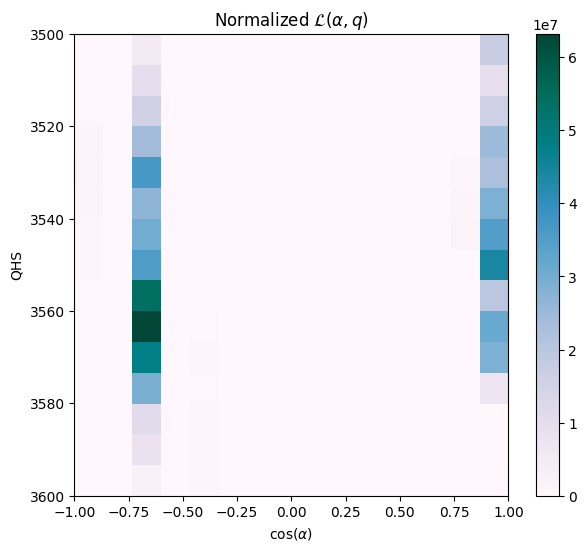

In [60]:
qhs_inf_cut = 3500
qhs_sup_cut = 3600

cut_condition = (tl208QHS > qhs_inf_cut) & (tl208QHS < qhs_sup_cut)

counts, xedge, yedge = np.histogram2d(x = tl208QHS[cut_condition], y = tl208_cos_alpha[cut_condition], bins = (15, 15))

# ======= Normalization by multiplying for the number of hits =======
N = np.sum(counts, axis = 0)
norm_counts = counts * N


# ======= Plot =======
plt.figure(figsize=(7,6))
plt.imshow(norm_counts, extent = [-1, 1, qhs_sup_cut,  qhs_inf_cut], aspect = 'auto', cmap = cm.PuBuGn)

plt.xlabel(r'cos($\alpha$)')
plt.ylabel('QHS')

plt.title(r'Normalized $\mathcal{L}(\alpha, q)$')

plt.colorbar()

plt.show()

## Charge-Energy Correlation

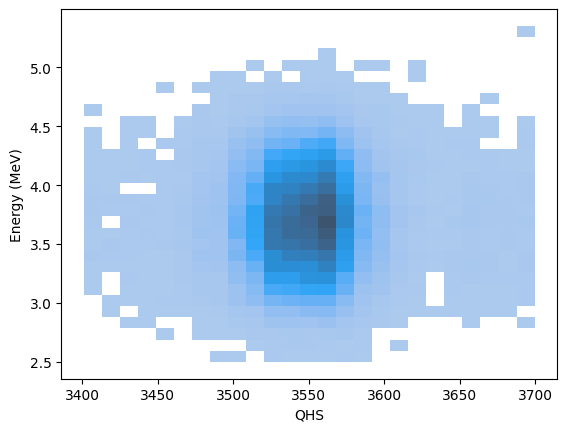

In [39]:
qhs_inf_cut = 3400
qhs_sup_cut = 3700

cut_condition = (tl208QHS > qhs_inf_cut) & (tl208QHS < qhs_sup_cut)

sn.histplot(x = tl208QHS[cut_condition], y = tl208_energy[cut_condition], bins = (25, 30))

plt.xlabel('QHS')
plt.ylabel(r'Energy (MeV)')

#plt.xlim(qhs_inf_cut, qhs_sup_cut)
#plt.ylim(-1, 1)

plt.show()